In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob

from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.models import KeyedVectors


In [10]:
# Load the pretrained model
model_path = '../Documents/google_new_pretrainedWord2Vec/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)




In [11]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model]
    if len(doc) == 0:
        return None
    else:
        return np.mean(word2vec_model[doc], axis=0)

In [12]:
# loading trauma, healthy and mundane texts
text_t = glob.glob('../Documents/prePost/transcribed_recall/*rauma*.txt')
text_m = glob.glob('../Documents/prePost/transcribed_recall/*undane*.txt')
text_h = glob.glob('../Documents/prePost/transcribed_recall/*ealthy*.txt')

texts = text_t + text_m + text_h

In [13]:
len(texts)

33

In [14]:
from sklearn.cluster import KMeans

# Assuming `texts` is a list of documents (each document is a list of words)
document_vectors = [document_vector(model, doc) for doc in texts]
document_vectors = [vec for vec in document_vectors if vec is not None]

# Cluster the documents using KMeans
num_clusters = 3  # or however many clusters you want
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(document_vectors)

# Assign clusters back to our documents
texts_with_clusters = list(zip(texts, kmeans.labels_))


In [15]:
texts_with_clusters

[('../Documents/prePost/transcribed_recall/sub-1599_trauma.txt', 0),
 ('../Documents/prePost/transcribed_recall/sub1547_trauma.txt', 0),
 ('../Documents/prePost/transcribed_recall/sub-1676_trauma.txt', 0),
 ('../Documents/prePost/transcribed_recall/sub_1547_trauma.txt', 0),
 ('../Documents/prePost/transcribed_recall/sub-1640_trauma.txt', 0),
 ('../Documents/prePost/transcribed_recall/sub-1629_trauma.txt', 0),
 ('../Documents/prePost/transcribed_recall/sub-1547_trauma.txt', 0),
 ('../Documents/prePost/transcribed_recall/sub-1237_trauma.txt', 0),
 ('../Documents/prePost/transcribed_recall/sub-1687_mundane.txt', 1),
 ('../Documents/prePost/transcribed_recall/sub-1599_mundane.txt', 1),
 ('../Documents/prePost/transcribed_recall/sub-1674_mundane.txt', 1),
 ('../Documents/prePost/transcribed_recall/sub-1684_mundane.txt', 1),
 ('../Documents/prePost/transcribed_recall/sub-1384_mundane.txt', 1),
 ('../Documents/prePost/transcribed_recall/sub-1682_mundane.txt', 1),
 ('../Documents/prePost/trans

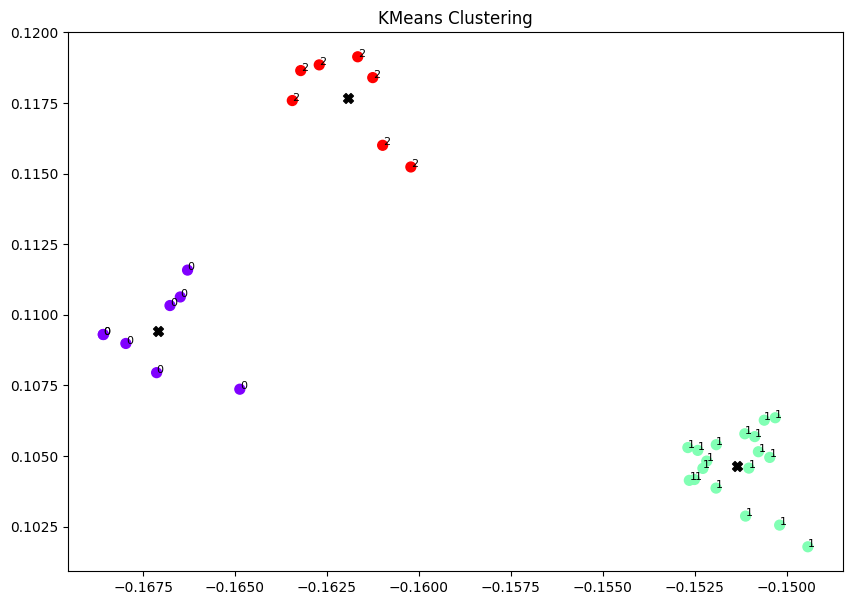

In [16]:
import matplotlib.pyplot as plt

def plot_2d_clusters(data, cluster_labels):
    plt.figure(figsize=(10, 7))
    
    # Scatter plot: data points are colored based on their cluster
    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='rainbow', s=50)
    
    # Plotting the centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='black', marker='X')
    
    # Annotating the data points with their cluster labels
    for i, txt in enumerate(cluster_labels):
        plt.annotate(txt, (data[i, 0], data[i, 1]), fontsize=8)
    
    plt.title("KMeans Clustering")
    plt.show()

# Assuming document_vectors is a 2D array
plot_2d_clusters(np.array(document_vectors), kmeans.labels_)


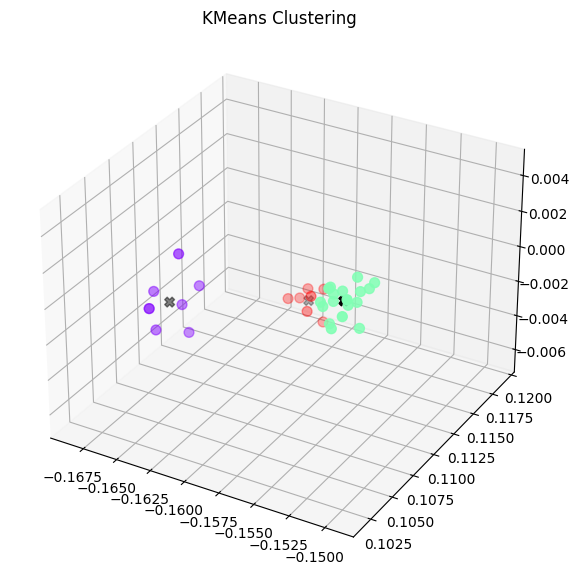

In [18]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_clusters(data, cluster_labels):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot: data points are colored based on their cluster
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=cluster_labels, cmap='rainbow', s=50)
    
    # Plotting the centroids of the clusters
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=50, c='black', marker='X')
    
    plt.title("KMeans Clustering")
    plt.show()

# Assuming document_vectors is a 3D array
plot_3d_clusters(np.array(document_vectors), kmeans.labels_)
